In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


La densidad para el halo de materia oscura está dado por 
$$\begin{equation}
\frac{\rho_{h} (R,z)}{\rho_{h,0}} =  (\frac{\sqrt{R^{2} + z^{2}/q_{h}^{2}}}{a_{b}})^{-\alpha_b} (1 + \frac{\sqrt{R^{2} + z^{2}/q_{h}^{2}}}{a_{h}})^{\alpha_{h} - \beta_{h}}
\end{equation}$$

In [2]:
def densidad_h(R,z,q_h=0.8,alpha_h=-2.,a_h=3.83,beta_h=2.96):
    m = np.sqrt(R**2. + z**2./q_h**2.) 
    t1 = (m/a_h)**(-alpha_h)
    d = (1. + m/a_h)**(alpha_h-beta_h)
    rho_h = t1*d
    return rho_h

In [3]:
R = np.linspace(-15.,15.,100)
z = np.linspace(-15.,15.,100)

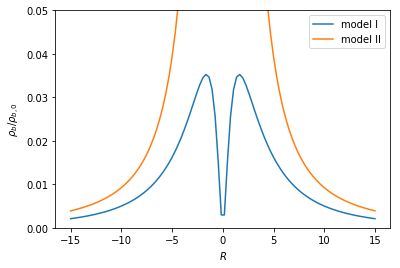

In [4]:
plt.plot(R, densidad_h(R,z),label='model I')
plt.plot(R, densidad_h(R,z,alpha_h=1.63,a_h=1.90,beta_h=2.17),label='model II')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{b}/\rho_{b,0}$')
plt.legend(loc='upper right', prop={'size':10})
ylim(0.,0.05)
plt.show()

Para calcular la velocidad circular volvemos a utiliar la expresión (2.132) del libro Galactic Dynamics, Binney & Tremaine
$$\begin{equation}
v_{c}^{2} (R) = 4\pi G\sqrt{1-e^{2}} \int_{0}^{R} dm \frac{m^{2} \rho (m^{2})}{\sqrt{R^{2} - m^{2}e^{2}}}
\end{equation}$$

$$\begin{equation}
\frac{v_{c}^{2}}{4\pi U\sqrt{1-e^{2}}} = y^{2-\alpha_{h}}\int_{0}^{1} \frac{x^{2-\alpha_{h}}}{\sqrt{1-x^{2}e^{2}}} (1-xy)^{\alpha_{h}-\beta_{h}}
\end{equation}$$
donde $U = G\rho_{h,0}a_{h}^{2}$

In [2]:
#Constants
G = 4.302e-6
q_h = 0.8
a_h_I = 3.83
a_h_II = 1.9
rho_h_I = 0.711e9
rho_h_II = 0.266e9
U_1 = G*rho_h_I*a_h_I**2.
U_2 = G*rho_h_II*a_h_II**2.
C = 4.*np.pi*q_h

In [3]:
def I_h_1(x,y,q_h=0.8,alpha_h=-2.,a_h=a_h_I,beta_h=2.96):
    #e = np.sqrt(1.-q_h**2.)
    t1 = x**(2.-alpha_h) 
    t3 = x*y
    t2 = (1.+x*y)**(alpha_h-beta_h)
    d = np.sqrt(1.-x**2. * (1.-q_h**2.))
    n = t1*t2
    return (n*y**(2.-alpha_h))/d

In [4]:
def I_h_2(x,y,q_h=0.8,alpha_h=1.63,a_h=a_h_II,beta_h=2.17):
    e = np.sqrt(1.-q_h**2.)
    n = x**(2.-alpha_h)*(1+x*y)**(alpha_h-beta_h)
    d = np.sqrt(1.-x**2. * e**2.)
    return y**(2.-alpha_h)*n/d

In [8]:
y = np.linspace(0.,15.,100)

In [6]:
from scipy import integrate

In [7]:
def Vc_ad_b_1(l):
    Integral_h_1 = []
    for i in range (0,len(l)):
        result = integrate.quad(I_h_1,0,1,args=(l[i]))[0]
        Integral_h_1.append(result)
    return np.array(Integral_h_1)

In [8]:
def Vc_ad_b_2(l):
    Integral_h_2 = []
    for i in range (0,len(l)):
        result = integrate.quad(I_h_2,0,1,args=(l[i]))[0]
        Integral_h_2.append(result)
    return np.array(Integral_h_2)

In [9]:
R = np.linspace(0.,15.,100)

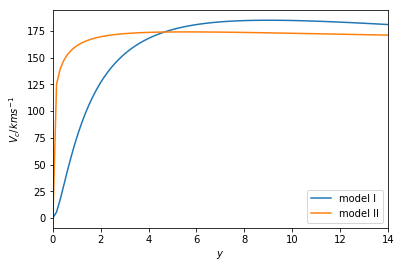

In [16]:
Vc_DM_I = np.sqrt(C*U_1*Vc_ad_b_1(y))
Vc_DM_II = np.sqrt(C*U_2*Vc_ad_b_2(y))
plt.plot(r,Vc_DM_I,label='model I')
plt.plot(r,Vc_DM_II,label='model II')
xlim(0.,14.)
plt.xlabel(r'$y$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.show()

In [10]:
def integral_R(x,R,q_h=0.8,alpha_h=-2.,a_h=a_h_I,beta_h=2.96):
    e = np.sqrt(1.- q_h**2.)
    n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
    d = np.sqrt(1-x**2.*e**2)
    t = R**2.*(R/a_h)**(-alpha_h)
    result = (t*n)/d
    return result
def integral_R_II(x,R,q_h=0.8,alpha_h=1.63,a_h=a_h_II,beta_h=2.17):
    e = np.sqrt(1.- q_h**2.)
    n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
    d = np.sqrt(1-x**2.*e**2)
    t = R**2.*(R/a_h)**(-alpha_h)
    result = (t*n)/d
    return result

In [11]:
def Vc_R(l):
    Integral_R = []
    for i in range (0,len(l)):
        result = integrate.quad(integral_R,0,0.9,args=(l[i]))[0]
        Integral_R.append(result)
    return np.array(Integral_R)
def Vc_R_II(l):
    Integral_R = []
    for i in range (0,len(l)):
        result = integrate.quad(integral_R_II,0,0.9,args=(l[i]))[0]
        Integral_R.append(result)
    return np.array(Integral_R)

In [31]:
R= np.linspace(0.1,15.,100)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


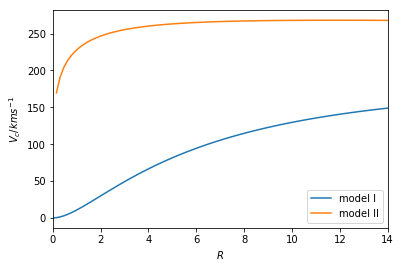

In [14]:
V_de_R = np.sqrt(C*G*rho_h_I*Vc_R(R))
V_de_R_II = np.sqrt(C*G*rho_h_I*Vc_R_II(R))
plt.plot(R,V_de_R,label='model I')
plt.plot(R,V_de_R_II,label='model II')
xlim(0.,14.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('DMHalo_Models_I_II.pdf')
plt.show()